### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [7]:
tienda["tienda"] = "tienda_1"
tienda2["tienda"] = "tienda_2"
tienda3["tienda"] = "tienda_3"
tienda4["tienda"] = "tienda_4"

tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

tiendas.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,tienda_1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,tienda_1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,tienda_1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,tienda_1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,tienda_1


#1. Análisis de facturación



In [13]:
pd.set_option('display.float_format', '{:,.1f}'.format)

In [14]:
fac= tiendas.groupby("tienda")["Precio"].sum()
fac

,Precio
tienda,
tienda_1,"1,150,880,400.0"
tienda_2,"1,116,343,500.0"
tienda_3,"1,098,019,600.0"
tienda_4,"1,038,375,700.0"


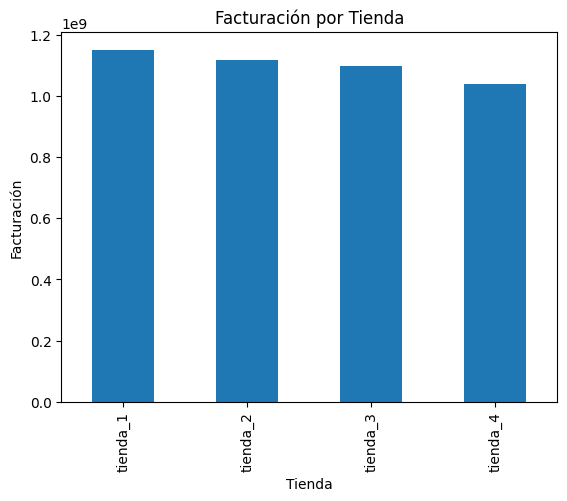

In [12]:
import matplotlib.pyplot as plt


fac.plot(kind='bar')
plt.xlabel("Tienda")
plt.ylabel("Facturación")
plt.title("Facturación por Tienda")
plt.show()


# 2. Ventas por categoría

In [15]:
vxc= tiendas.groupby("Categoría del Producto")["Precio"].sum()
vxc

,Precio
Categoría del Producto,
Artículos para el hogar,"57,579,800.0"
Deportes y diversión,"142,977,700.0"
Electrodomésticos,"1,324,751,100.0"
Electrónicos,"1,660,576,500.0"
Instrumentos musicales,"348,772,600.0"
Juguetes,"73,604,400.0"
Libros,"37,696,100.0"
Muebles,"757,661,000.0"


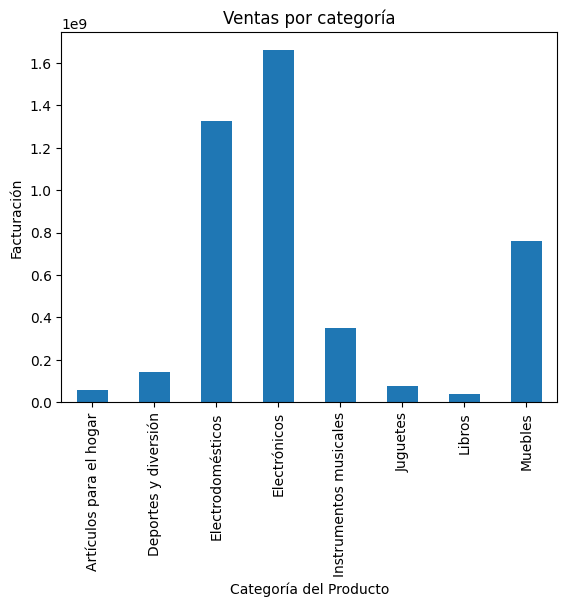

In [16]:
vxc.plot(kind='bar')
plt.xlabel("Categoría del Producto")
plt.ylabel("Facturación")
plt.title("Ventas por categoría")
plt.show()

# 3. Calificación promedio de la tienda


In [18]:
cpt= tiendas.groupby("Producto")["Calificación"].mean()
cpt

,Calificación
tienda,
tienda_1,4.0
tienda_2,4.0
tienda_3,4.0
tienda_4,4.0


# 4. Productos más y menos vendidos

In [24]:
pmymv= tiendas.groupby("Producto")["Producto"].count()


In [25]:
#top 5 productos mas vendidos

pmymv.sort_values(ascending=False).head()

,Producto
Producto,
Mesa de noche,210
Microondas,206
Carrito de control remoto,206
Batería,203
Cama king,201


In [26]:
#top 5 productos menos vendidos

pmymv.sort_values(ascending=True).head()

,Producto
Producto,
Celular ABXY,157
Auriculares con micrófono,158
Mochila,163
Guitarra eléctrica,165
Ciencia de datos con Python,166


# 5. Envío promedio por tienda

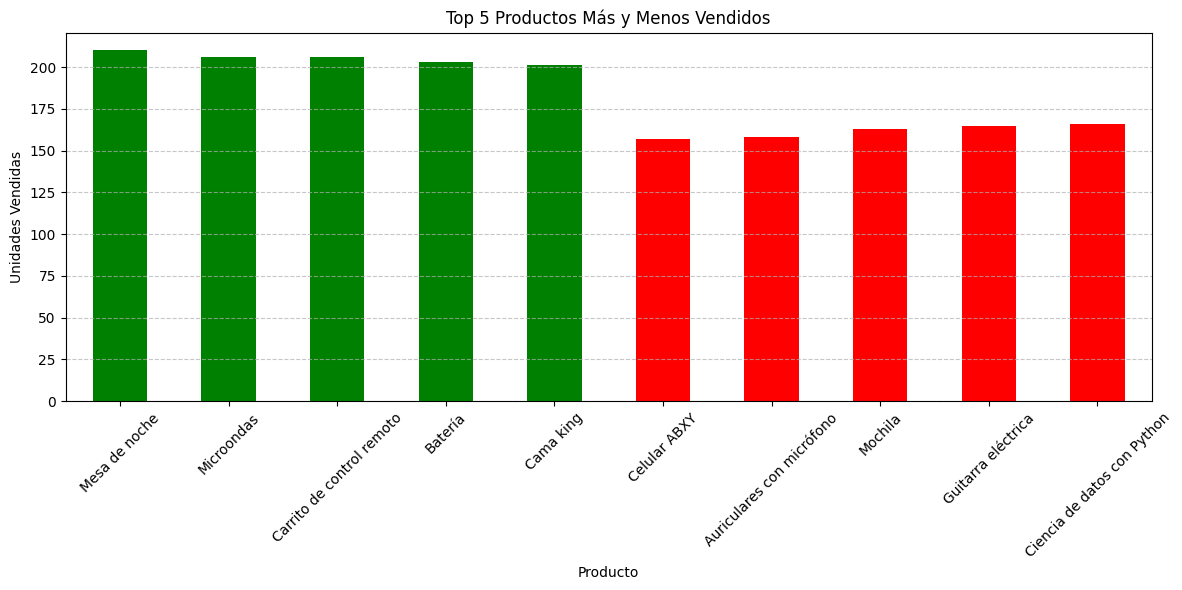

In [30]:
top_5 = pmymv.sort_values(ascending=False).head(5)
bottom_5 = pmymv.sort_values(ascending=True).head(5)


top_bottom = pd.concat([top_5, bottom_5])

colors = ['green'] * 5 + ['red'] * 5

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
top_bottom.plot(kind='bar', color=colors)
plt.title('Top 5 Productos Más y Menos Vendidos')
plt.ylabel('Unidades Vendidas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()